<a href="https://colab.research.google.com/github/BenSmithGreyGroup/navani/blob/main/tutorials/Battery_subgroup_150222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Python to process echem data

## Quick introduction to colab

Colab is a collaborative ipython notebook set up by google. It runs on google servers, and can be shared, commented and edited in a similar manner to a google doc. This makes it easy to get going with some programming, as everything is pre-installed and you don't have to install things on your own computer.

**Uploading data**

There are two main ways to upload your data to colab:


1.   Manually upload using the file browser
2.   Link your google drive





### 1. File Browser ###


Navigate to the file browser in the left tab, click on it and the notebook will connect to a runtime.

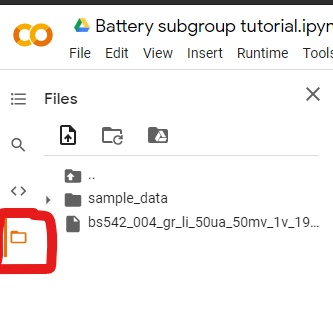

Then click the upload file button, select the file you wish to upload and click open.

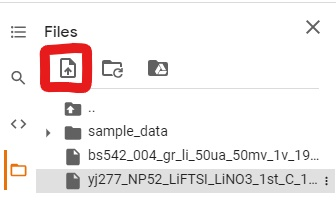

A new file will then appear in the file browser

### 2. Mounting your drive

In the file broswer click the mount google drive button

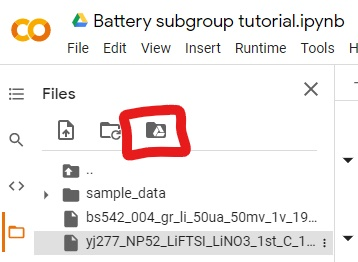

This mounts your drive to the colab session - allowing you to read and write straight to your google drive

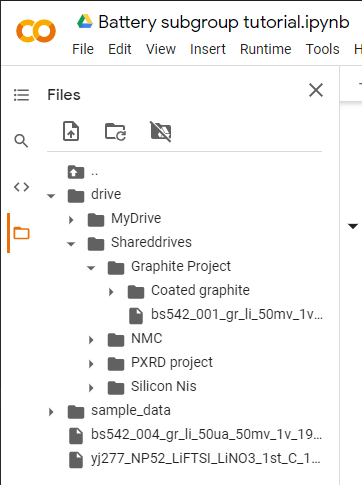

You can also run the below code to mount your drive - you can then name your drive directory whatever you like

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip "/content/drive/Shareddrives/Sarang NMC/Copy of Copy of NMC_010819.zip"

# Importing and installing packages

## Installing widely used packages

You will probably have either conda or pip installed if you have installed python on your computer. Macs come with pip preinstalled which makes things easier, but both work!

You can use conda or pip to install widely used packages easily, just copy the code below into either terminal (mac) or cmd (windows) and remove the exclamation mark!

In [ ]:
!pip install pandas

!conda install pandas

Packages are collections of code that other people have written, that you want to use. Some packages like numpy are pretty much universally used and are easy to install. Others, like navani (written by me) not many people use, and can have a few more bugs.

To install user writen packages you will probably need to install git at some point. Git is a free and open source distributed version control system designed to handle everything from small to very large projects with speed and efficiency.


It comes pre-installed on mac, if you have windows you will need to install it yourself:

https://git-scm.com/book/en/v2/Getting-Started-Installing-Git

https://git-scm.com/download/win

There are lots of guides on the internet to help so this shouldn't be a problem! Note that you will need to restart terminal or your cmd once you've installed git for it to work properly.

To check if you have git, conda or pip already installed you can type these into the command line:

In [ ]:
!pip --version
!git -- version
!conda -- version

pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


## Installing lesser widely used packages from GitHub

To install packages directly from GitHub you will need pip and git installed. If you only have conda installed you can use conda to install pip:

In [ ]:
!conda install pip

Once you have pip and git installed you can install packages directly from GitHub. To install my electrochemistry package you can simply use the code below.

In [1]:
!pip install git+https://github.com/BenSmithGreyGroup/navani

  Cloning https://github.com/BenSmithGreyGroup/navani to /tmp/pip-req-build-ofxe4xo4
  Running command git clone -q https://github.com/BenSmithGreyGroup/navani /tmp/pip-req-build-ofxe4xo4
  Created wheel for navani: filename=navani-0.1.1-py3-none-any.whl size=7248 sha256=16fa1dc3489d64526c20522b0c121a9cfd047abc5ddff3f95e3b63d14c74bbf8
  Stored in directory: /tmp/pip-ephem-wheel-cache-nx2z29ou/wheels/ad/ea/49/2ce17705e69e2b6f7fc2a182a0f31b161a0a215995c33a8ead
Successfully built navani


This will download the most up to date version of the package from GitHub

Packages are collections of code that other people have written, that you want to use. Some packages like numpy are pretty much universally used and are easy to install. Others, like navani (written by me) not many people use, and can have a few more bugs.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
import os

# What does navani do?

Navani reads in different format electrochemistry files and processes them into the same format. So far it works on:



*   Land .xlsx 
*   Biologic .mpr
*   Ivium .txt
*   Arbin .xlsx
*   Arbin .res (you need mdbtools installed - only works on mac and linux)



```
df = ec.echem_file_loader(file)
```









Once your data is read in in the correct format it's easy to plot and perform analysis! There are some example functions for you to use in navani:



```
summary_df = ec.cycle_summary(df)
```
This function computes statistics per cycle - you get things like the capacity, CE, average voltages on charge and discharge etc.



```
linear_voltage, dqdv, capacity = ec.dqdv_single_cycle(capacity, voltage)
```
This gives you the dQ/dV for the supplied voltage and capacity values.



In [3]:
from navani import echem as ec

You can use one function to read in all files, and it returns the file as a pandas dataframe

In [4]:
df = ec.echem_file_loader('/content/yj277_NP52_LiFTSI_LiNO3_1st_C_100_2nd_C_10_C11.mpr')

In [5]:
df.head()

flags  Ns  time/s  ...  cycle change      Capacity  full cycle
0      7   0  0.0000  ...         False  0.000000e+00         0.0
1      7   0  0.9998  ...         False  0.000000e+00         0.0
2     33   1  1.0000  ...          True  4.691860e-10         1.0
3      1   1  1.4184  ...         False  9.926585e-07         1.0
4      1   1  2.2264  ...         False  2.908946e-06         1.0

[5 rows x 16 columns]

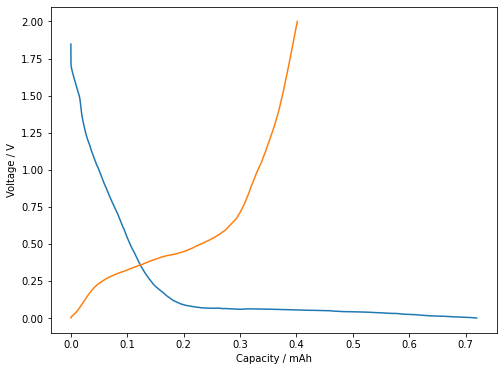

In [10]:
fig, ax = ec.charge_discharge_plot(df, full_cycle=1)
fig.set_size_inches(8, 6)

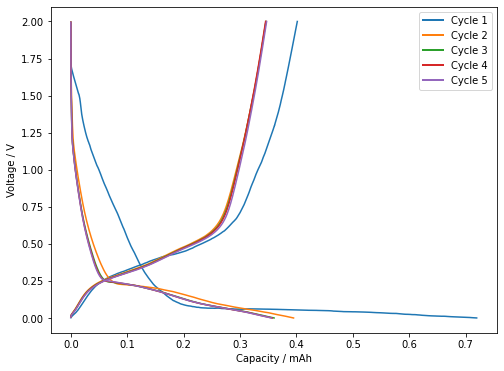

In [11]:
fig, ax = ec.charge_discharge_plot(df, full_cycle=[1, 2, 3, 4, 5])
fig.set_size_inches(8, 6)

(0.0, 0.4)

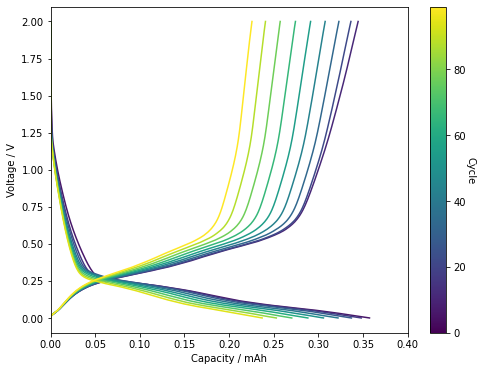

In [16]:
fig, ax = ec.multi_cycle_plot(df, cycles=df['half cycle'].unique()[::11])
fig.set_size_inches(8, 6)
ax.set_xlim(0, 0.4)

## Cycle statistics

In [17]:
summary_df = ec.cycle_summary(df)

In [18]:
summary_df.head()

Current  ...  Average Charge Voltage
full cycle              ...                        
0.0           0.000000  ...                     NaN
1.0         543.601971  ...                0.598582
2.0         -54.541423  ...                0.565110
3.0         120.502145  ...                0.557348
4.0          93.596800  ...                0.553188

[5 rows x 8 columns]

Text(0.5, 0, 'Cycle')

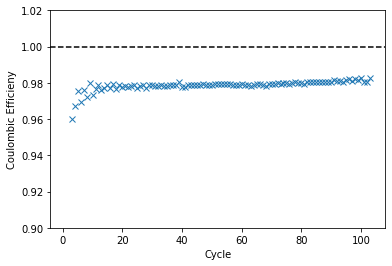

In [ ]:
plt.plot(summary_df['CE'], marker='x', linestyle='')
plt.ylim(0.9, 1.02)
plt.axhline(1, linestyle='--', color='k')
plt.ylabel('Coulombic Efficieny')
plt.xlabel('Cycle')

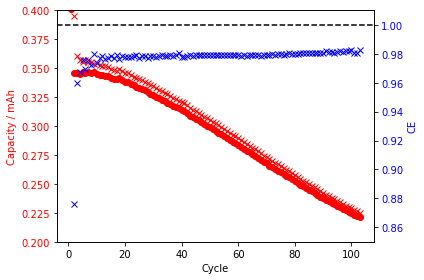

In [19]:
fig, ax1 = plt.subplots()
color = 'red'
ax1.set_xlabel('Cycle')
ax1.set_ylabel('Capacity / mAh', color=color)
ax1.plot(summary_df['Charge Capacity'], color=color, marker='o', linestyle='')
ax1.plot(summary_df['Discharge Capacity'], color=color, marker='x', linestyle='')

ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0.2, 0.4)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('CE', color=color)  # we already handled the x-label with ax1
ax2.plot(summary_df['CE'], color=color, linestyle='', marker='x')
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(1, color='k', linestyle='--')
ax2.set_ylim(0.85, 1.01)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

## dQ/dV

Navani contains some built in code to get the dQ/dV - I covered this in more detail last time but it involves smoothing then differentiating the data. The quality of the plots is very dependent on choosing the right smoothing parameters. This depends a lot on the noise in the data and how flat the plateaus are.

In [39]:
mask = df['half cycle'] == 3

linear_voltage, dqdv, capacity = ec.dqdv_single_cycle(df['Capacity'][mask], df['Voltage'][mask],
                                                      window_size_1=551,
                                                        polyorder_1=5,
                                                        s_spline=1e-5,
                                                        window_size_2=151,
                                                        polyorder_2=3,
                                                        final_smooth=True)

Text(0.5, 0, 'Voltage')

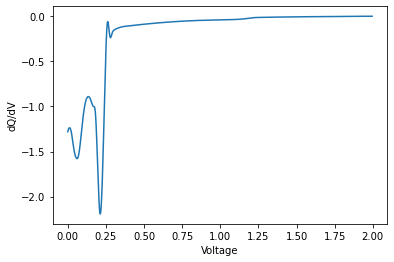

In [40]:
plt.plot(linear_voltage, dqdv)
plt.ylabel('dQ/dV')
plt.xlabel('Voltage')

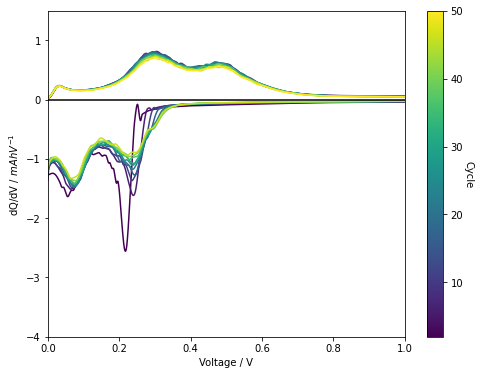

In [38]:
fig, ax = ec.multi_dqdv_plot(df, cycles=[3, 11, 12, 21, 22, 31, 32, 41, 42, 51, 52, 61, 62, 71, 72, 81, 82, 91, 92, 100],
                    colormap='viridis',
                    window_size_1=51,
                    polyorder_1=5,
                    s_spline=1e-7,
                    window_size_2=351,
                    polyorder_2=5,
                    final_smooth=True)

fig.set_size_inches(8, 6)
ax.set_ylim(-4, 1.5)
ax.set_xlim(0, 1)
ax.axhline(0, color='black')
fig.savefig('/content/drive/MyDrive/Si_dQdV.pdf', dpi=220)

In [ ]:
import seaborn as sns
from scipy.interpolate import splrep
columns = np.linspace(0, 0.4, 1000)
heatmap_df = pd.DataFrame(index=summary_df.index[1:], columns=columns)

for cycle in heatmap_df.index:
    mask = (df['full cycle'] == cycle) & (df['state'] == 1)
    linear_voltage, dqdv, capacity = ec.dqdv_single_cycle(df['Capacity'][mask], df['Voltage'][mask],
                                                      window_size_1=151,
                                                        polyorder_1=5,
                                                        s_spline=1e-8,
                                                        window_size_2=151,
                                                        polyorder_2=3,
                                                        final_smooth=True)
    f_lit = splrep(linear_voltage, dqdv, s=0.0, k=1)
    heatmap_df.loc[cycle, columns] = abs(splev(columns, f_lit))

Text(0, 0.5, 'Cycle number')

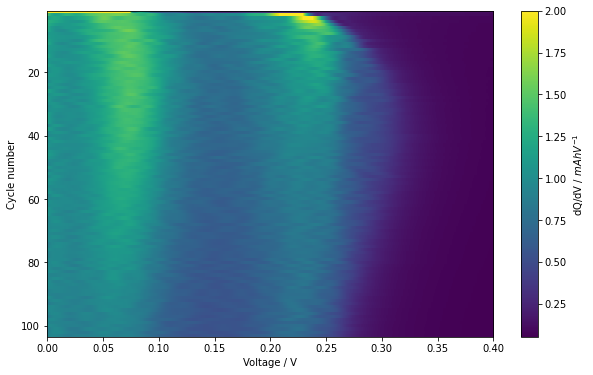

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
c = np.array(heatmap_df.columns)
x = np.concatenate((c,[c[-1]+np.diff(c)[-1]]))-np.diff(c)[-1]/2.
r = np.array(heatmap_df.index)
y = np.concatenate((r,[r[-1]+np.diff(r)[-1]]))-np.diff(r)[-1]/2.

plt.imshow(heatmap_df.applymap(float).values, interpolation='nearest', cmap='viridis', 
           extent=[x.min(), x.max(), y.max(), y.min()],
           aspect='auto', vmax=2)

plt.colorbar(label=r'dQ/dV / $mAhV^{-1}$')
ax.set_xlabel('Voltage / V')
ax.set_ylabel('Cycle number')

# What next?

I'm working on making dV/dQ fitting easier - especially over large datasets!

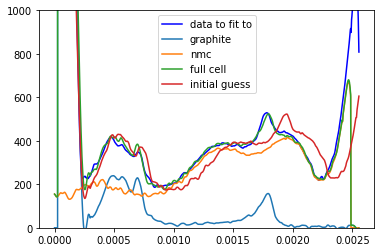

Bloom, I., Jansen, A. N., Abraham, D. P., Knuth, J., Jones, S. A., Battaglia, V. S., & Henriksen, G. L. (2005). Differential voltage analyses of high-power, lithium-ion cells 1. Technique and application. Journal of Power Sources, 139, 295–303. https://doi.org/10.1016/j.jpowsour.2004.07.021



Dose, W. M., Xu, C., Grey, C. P., & De Volder, M. F. L. (2020). Effect of Anode Slippage on Cathode Cutoff Potential and Degradation Mechanisms in Ni-Rich Li-Ion Batteries. Cell Reports Physical Science, 1(11), 100253. https://doi.org/10.1016/J.XCRP.2020.100253